In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train),(X_test,y_test) =  mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [9]:
single_image = X_train[0]
single_image.shape  

(28, 28)

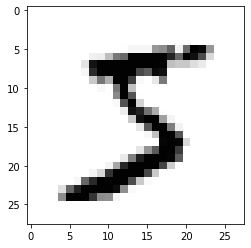

In [13]:
plt.imshow(single_image, cmap='Greys')

In [14]:
y_train[0]

5

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [17]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [18]:
# scale the image because value only range from 0-255
# divide by 255 can make all numbers range from 0-1

X_train = X_train/255 
X_test = X_test/255

In [21]:
# convolution need 4 dimension to reshape

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [22]:
X_test.shape

(10000, 28, 28, 1)

Start to build CNN model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
model = Sequential()

# convolution part
model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

# ANN
model.add(Dense(128, activation='relu'))

# ANN output
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [32]:
model.fit(X_train, y_cat_train, epochs = 10, validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2841 - accuracy: 0.9138 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0512 - accuracy: 0.9848 - val_loss: 0.0444 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0370 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0348 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0465 - val_accuracy: 0.9856


In [33]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138864,0.957833,0.055516,0.9819
1,0.049529,0.985500,0.044433,0.9852
2,0.031349,0.990367,0.036998,0.9876
3,0.021406,0.993050,0.034843,0.9887
4,0.014701,0.995167,0.046504,0.9856


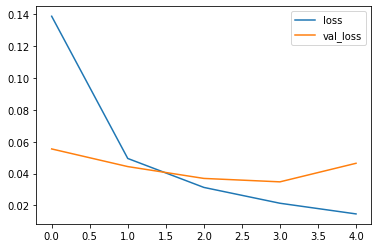

In [34]:
metrics[['loss','val_loss']].plot()

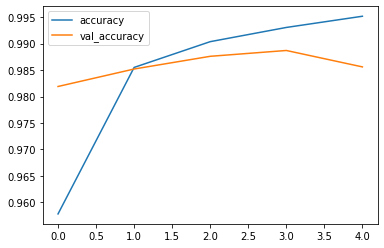

In [35]:
metrics[['accuracy','val_accuracy']].plot()

In [36]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.04650364816188812, 0.9855999946594238]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
print(confusion_matrix(y_test, y_pred))

[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1118    5    2    1    0    5    3    1    0]
 [   4    0 1013    0    2    0    0    5    8    0]
 [   0    0    2  995    0    7    0    0    6    0]
 [   0    0    0    0  970    0    0    0    1   11]
 [   2    0    0    3    0  881    4    0    2    0]
 [   4    1    0    0    6    1  944    0    2    0]
 [   1    0    8    0    1    0    0 1014    2    2]
 [   2    0    1    0    0    0    1    1  967    2]
 [   2    2    0    1    6    9    0    4    5  980]]


predict a single image

In [43]:
my_number = X_test[99]

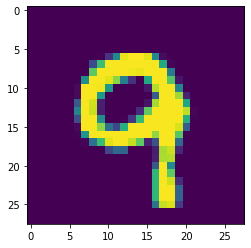

In [45]:
plt.imshow(my_number.reshape(28,28))

In [46]:
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])